Figure 1 of Wed Poly paper. Plot Temp, Salt, Rho (maybe 02, DIC) zonally averaged across Weddell Sea. Compare Wombat with and without neutral physics with WOCE and BGC obs estimates?

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
import seawater as sw


Populating the interactive namespace from numpy and matplotlib


In [2]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'
vgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
print geolon_t.shape

fh=fcor/ht
print fh.shape

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
print st_ocean.shape
print potrho.shape
print yt_ocean.shape


(1080, 1440)
(1080, 1440)
(50,)
(80,)
(1080,)


In [3]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

0.10.0


In [4]:
NP_CntrlDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
Ocean_File = os.path.join(NP_CntrlDir,'Tdim_output197*/ocean__*.nc')
print Ocean_File
np_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print np_cntrl.temp.shape

NoNP_CntrlDir = '/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
Ocean_File = os.path.join(NoNP_CntrlDir,'output197*/ocean__*.nc')
print Ocean_File
nonp_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print nonp_cntrl.temp.shape



/g/data1/v45/pas561/mom/archive/wombat_jun16z/Tdim_output197*/ocean__*.nc
(9, 50, 1080, 1440)
/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/output197*/ocean__*.nc
(9, 50, 1080, 1440)


In [10]:
nc = Dataset('/g/data1/v45/pas561/mom/archive/woa13_mom025_ocean_temp_salt.res.nc', mode='r') # file handle, open in read only mode
grid_xt = nc.variables['GRID_X_T'][:]
grid_yt = nc.variables['GRID_Y_T'][:]
zt = nc.variables['ZT'][:]
woa_temp = nc.variables['temp'][:]
woa_salt = nc.variables['salt'][:]
nc.close() # close the file

print woa_salt.shape, woa_temp.shape, grid_xt.shape, grid_yt.shape, zt.shape

woa_temp=np.squeeze(woa_temp)
woa_salt=np.squeeze(woa_salt)

print woa_salt.shape, woa_temp.shape


(1, 50, 1080, 1440) (1, 50, 1080, 1440) (1440,) (1080,) (50,)
(50, 1080, 1440) (50, 1080, 1440)


In [6]:
#calc WOA rho from T/S
#rho=sw.pden(30,30,100,0)
#print rho

#resize st_ocean to 50x1080x1440
#st_grid=np.tile(st_ocean,1080*1440).reshape(1440,1080,50)
#st_grid=np.transpose(st_grid)
#print st_grid.shape

#woa_rho0=sw.pden(woa_salt,woa_temp,st_grid,0)
#print woa_rho0[0:5,500,500]
    
of='/g/data1/v45/pas561/mom/archive/woa13_mom025_ocean_temp_salt_to_rho0.npy'
#print of
#a=np.save(of,woa_rho0)
woa_rho=np.load(of)
print woa_rho.shape

(50, 1080, 1440)


In [7]:
#mask bathy 
msk=np_cntrl.temp[0].load()
print msk[:,500,500]
print woa_temp[:,500,500]


woa_temp[np.where(isnan(msk))]=nan
print woa_temp[:,500,500]
woa_salt[np.where(isnan(msk))]=nan
print woa_salt[:,500,500]
woa_rho[np.where(isnan(msk))]=nan
print woa_rho[:,500,500]


<xarray.DataArray 'temp' (st_ocean: 50)>
array([ 27.42457 ,  27.403734,  27.367304,  27.31325 ,  27.230392,  27.099178,
        26.885996,  26.607784,  25.946142,  24.842489,  23.548683,  21.788708,
        19.614935,  17.0357  ,  14.532685,  12.557178,  11.19963 ,  10.167709,
         9.405543,   8.86235 ,   8.378262,   7.889383,   7.349973,   6.820796,
         6.328948,   5.805981,   5.194328,   4.543918,   3.917311,   3.368901,
         2.968703,   2.647794,   2.374471,   2.157863,   1.963835,   1.798335,
         1.668957,   1.546484,   1.44171 ,   1.379732,   1.321743,   1.272609,
         1.230481,   1.185575,   1.097728,   1.058901,   1.04375 ,        nan,
              nan,        nan])
Coordinates:
    xt_ocean  float64 -154.9
    yt_ocean  float64 0.625
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 55.85 66.26 ...
Attributes:
    long_name:      Potential temperature
    units:          degrees C
    valid_range:    [ -10.  500.]
    cell_methods:   time: mea

In [11]:
#calc zonal average anomalies
#Plot zonal average anomaly across weddell
#could also try -65 to get full Weddell Sea
x1=np.argwhere(grid_xt<-60)
x2=np.argwhere(grid_xt<0)#was going to -15 but woa o2 data resets at 0
x1=x1[-1]
x2=x2[-1]

y1=np.argwhere(grid_yt<-55)
#y2=np.argwhere(xt_ocean<15)
y1=y1[-1]
#y2=y2[-1]
print x1, x2, grid_xt[x1],grid_xt[x2], grid_yt[y1]


[879] [1119] [-60.125] [-0.125] [-55.13874852]


[ 27.5    27.502  27.504  27.506  27.508  27.51   27.512  27.514  27.516
  27.518  27.52   27.522  27.524  27.526  27.528  27.53   27.532  27.534
  27.536  27.538  27.54   27.542  27.544  27.546  27.548  27.55   27.552
  27.554  27.556  27.558  27.56   27.562  27.564  27.566  27.568  27.57
  27.572  27.574  27.576  27.578  27.58   27.582  27.584  27.586  27.588
  27.59   27.592  27.594  27.596  27.598  27.6    27.602  27.604  27.606
  27.608  27.61   27.612  27.614  27.616  27.618  27.62   27.622  27.624
  27.626  27.628  27.63   27.632  27.634  27.636  27.638  27.64   27.642
  27.644  27.646  27.648  27.65   27.652  27.654  27.656  27.658  27.66
  27.662  27.664  27.666  27.668  27.67   27.672  27.674  27.676  27.678
  27.68   27.682  27.684  27.686  27.688  27.69   27.692  27.694  27.696
  27.698  27.7    27.702  27.704  27.706  27.708  27.71   27.712  27.714
  27.716  27.718  27.72   27.722  27.724  27.726  27.728  27.73   27.732
  27.734  27.736  27.738  27.74   27.742  27.744  27.

/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/xarray/core/indexing.py:305: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  return None if value is None else operator.index(value)
/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


(50, 500)
(50, 500)


Text(0.5,0,u'$kg/m^3$')

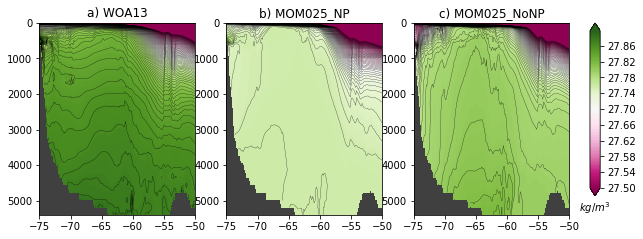

In [9]:
#plot control zavg temp, rho, salt 
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.title('Zonal Avg Tracers 40W-15E')

var1=np.nanmean(woa_rho[:,0:500,x1:x2],axis=2)

clev = np.arange(27.5,27.9,.002)
print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(27.5,27.9,.005)
print clev3

plt.subplot(3,3,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(grid_yt[0:500],zt,var1-1000,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1-1000,levels=clev3,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('a) WOA13')

yr=0

var1=np_cntrl.pot_rho_0[0:9,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1-1000,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1-1000,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('b) MOM025_NP')

var1=nonp_cntrl.pot_rho_0[0:9,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1-1000,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1-1000,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('c) MOM025_NoNP')

ax3 = plt.axes([0.93,0.68,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$kg/m^3$')




[ -2.00000000e+00  -1.95000000e+00  -1.90000000e+00  -1.85000000e+00
  -1.80000000e+00  -1.75000000e+00  -1.70000000e+00  -1.65000000e+00
  -1.60000000e+00  -1.55000000e+00  -1.50000000e+00  -1.45000000e+00
  -1.40000000e+00  -1.35000000e+00  -1.30000000e+00  -1.25000000e+00
  -1.20000000e+00  -1.15000000e+00  -1.10000000e+00  -1.05000000e+00
  -1.00000000e+00  -9.50000000e-01  -9.00000000e-01  -8.50000000e-01
  -8.00000000e-01  -7.50000000e-01  -7.00000000e-01  -6.50000000e-01
  -6.00000000e-01  -5.50000000e-01  -5.00000000e-01  -4.50000000e-01
  -4.00000000e-01  -3.50000000e-01  -3.00000000e-01  -2.50000000e-01
  -2.00000000e-01  -1.50000000e-01  -1.00000000e-01  -5.00000000e-02
   1.77635684e-15   5.00000000e-02   1.00000000e-01   1.50000000e-01
   2.00000000e-01   2.50000000e-01   3.00000000e-01   3.50000000e-01
   4.00000000e-01   4.50000000e-01   5.00000000e-01   5.50000000e-01
   6.00000000e-01   6.50000000e-01   7.00000000e-01   7.50000000e-01
   8.00000000e-01   8.50000000e-01

/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


(50, 500)
(50, 500)


Text(0.5,0,u'$^\\circ C$')

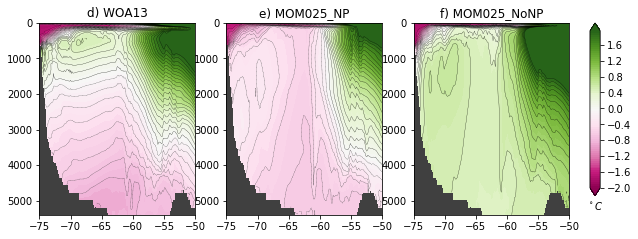

In [10]:
clev = np.arange(-2,2,.05)
print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(-2,2,.1)
print clev3

var1=np.nanmean(woa_temp[:,0:500,x1:x2],axis=2)

plt.subplot(3,3,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(grid_yt[0:500],zt,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('d) WOA13')

yr=0

var1=np_cntrl.temp[0:9,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('e) MOM025_NP')

var1=nonp_cntrl.temp[0:9,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('f) MOM025_NoNP')

ax3 = plt.axes([0.93,0.68,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$^\circ C$')



[ 34.    34.01  34.02  34.03  34.04  34.05  34.06  34.07  34.08  34.09
  34.1   34.11  34.12  34.13  34.14  34.15  34.16  34.17  34.18  34.19
  34.2   34.21  34.22  34.23  34.24  34.25  34.26  34.27  34.28  34.29
  34.3   34.31  34.32  34.33  34.34  34.35  34.36  34.37  34.38  34.39
  34.4   34.41  34.42  34.43  34.44  34.45  34.46  34.47  34.48  34.49
  34.5   34.51  34.52  34.53  34.54  34.55  34.56  34.57  34.58  34.59
  34.6   34.61  34.62  34.63  34.64  34.65  34.66  34.67  34.68  34.69
  34.7   34.71  34.72  34.73  34.74  34.75  34.76  34.77  34.78  34.79]
[ 34.    34.02  34.04  34.06  34.08  34.1   34.12  34.14  34.16  34.18
  34.2   34.22  34.24  34.26  34.28  34.3   34.32  34.34  34.36  34.38
  34.4   34.42  34.44  34.46  34.48  34.5   34.52  34.54  34.56  34.58
  34.6   34.62  34.64  34.66  34.68  34.7   34.72  34.74  34.76  34.78]


/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


(50, 500)
(50, 500)


Text(0.5,0,u'$S_A$')

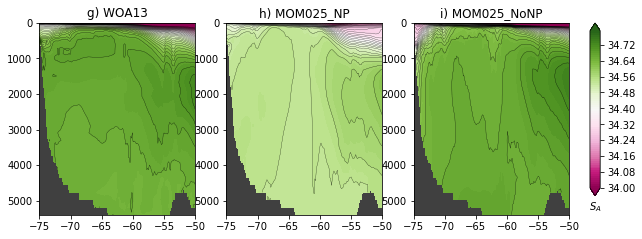

In [11]:
clev = np.arange(34,34.8,.01)
print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(34,34.8,.02)
print clev3

var1=np.nanmean(woa_salt[:,0:500,x1:x2],axis=2)

plt.subplot(3,3,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(grid_yt[0:500],zt,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('g) WOA13')

yr=0

var1=np_cntrl.salt[0:9,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('h) MOM025_NP')

var1=nonp_cntrl.salt[0:9,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('i) MOM025_NoNP')

ax3 = plt.axes([0.93,0.68,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$S_A$')




/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


(50, 500)
(50, 500)


/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/ipykernel/__main__.py:78: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


(50, 500)
(50, 500)


/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/ipykernel/__main__.py:145: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


(50, 500)
(50, 500)


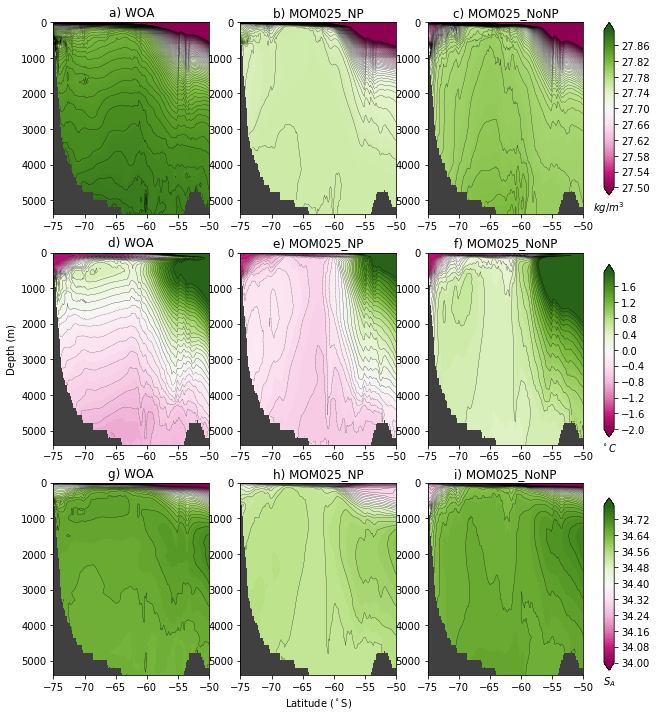

In [12]:
#plot control zavg temp, rho, salt 
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.title('Zonal Avg Tracers 40W-15E')
var1=np.nanmean(woa_rho[:,0:500,x1:x2],axis=2)

clev = np.arange(27.5,27.9,.002)
#print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(27.5,27.9,.005)
#print clev3

plt.subplot(3,3,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(grid_yt[0:500],zt,var1-1000,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1-1000,levels=clev3,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('a) WOA')

yr=0

var1=np_cntrl.pot_rho_0[0:9,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1-1000,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1-1000,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('b) MOM025_NP')

var1=nonp_cntrl.pot_rho_0[0:9,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1-1000,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1-1000,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('c) MOM025_NoNP')

ax3 = plt.axes([0.93,0.68,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$kg/m^3$')


clev = np.arange(-2,2,.05)
#print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(-2,2,.1)
#print clev3

var1=np.nanmean(woa_temp[:,0:500,x1:x2],axis=2)

plt.subplot(3,3,4)
plt.gca().patch.set_color('.25')
p1=plt.contourf(grid_yt[0:500],zt,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('d) WOA')

yr=0

var1=np_cntrl.temp[0:9,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,5)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('e) MOM025_NP')

var1=nonp_cntrl.temp[0:9,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,6)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('f) MOM025_NoNP')

ax3 = plt.axes([0.93,0.40,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$^\circ C$')


clev = np.arange(34,34.8,.01)
#print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(34,34.8,.02)
#print clev3

var1=np.nanmean(woa_salt[:,0:500,x1:x2],axis=2)

plt.subplot(3,3,7)
plt.gca().patch.set_color('.25')
p1=plt.contourf(grid_yt[0:500],zt,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('g) WOA')

yr=0

var1=np_cntrl.salt[0:9,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,8)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('h) MOM025_NP')

var1=nonp_cntrl.salt[0:9,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()
print var1.shape

plt.subplot(3,3,9)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('i) MOM025_NoNP')

ax3 = plt.axes([0.93,0.13,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$S_A$')

#plt.suptitle('Depth (m)',x=0.4,y=0.1,rotation=90,fontsize=14)
#plt.suptitle('Latitude ($^\circ$)',x=0.5,y=0.2,fontsize=14)

of = '/g/data1/v45/pas561/mom/archive/wp2_figs/TS_WOCE.png'
plt.savefig(of,dpi=220)



In [7]:
#do oxygen and dic comparison to obs

#model is in units of mmol/m^3 for 02

NP_CntrlDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
Ocean_File = os.path.join(NP_CntrlDir,'Tdim_output197*/ocean_bgc_carbon*.nc')
print Ocean_File
np_cntrl_bgc=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print np_cntrl_bgc.o2.shape

NoNP_CntrlDir = '/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
Ocean_File = os.path.join(NoNP_CntrlDir,'output197*/ocean_bgc_carbon*.nc')
print Ocean_File
nonp_cntrl_bgc=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print nonp_cntrl_bgc.o2.shape


/g/data1/v45/pas561/mom/archive/wombat_jun16z/Tdim_output197*/ocean_bgc_carbon*.nc
(108, 50, 1080, 1440)
/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/output197*/ocean_bgc_carbon*.nc
(108, 50, 1080, 1440)


In [5]:

#model is in units of mmol/m^3

#this seems like old WOA obs. Units are umols -> 1000 umol= mmol
nc = Dataset('/g/data1/v45/pas561/mom/archive/bgc_obs/Oxy.nc', mode='r') # file handle, open in read only mode
##lon goes from 0-360
woa1_lon = nc.variables['lon'][:]
woa1_lat = nc.variables['lat'][:]
woa1_depth = nc.variables['depth'][:]
woa1_oxy = nc.variables['Oxy'][:]
nc.close() # close the file

print woa1_oxy.shape
#print lat
#print lon

#this is the 2013v2 woa data from https://www.nodc.noaa.gov/OC5/woa13/woa13data.html
#units are ml/l
nc = Dataset('/g/data1/v45/pas561/mom/archive/bgc_obs/woa13_all_o00_01.nc', mode='r') # file handle, open in read only mode
#note lon goes from -180 to 180
woa2_lon = nc.variables['lon'][:]
woa2_lat = nc.variables['lat'][:]
woa2_depth = nc.variables['depth'][:]
woa2_oxy = nc.variables['o_an'][:]
nc.close() # close the file

print woa2_oxy.shape

print woa1_lat
print woa2_lat

#model data is in mmol/m3
#convert everything to umol/kg to match CCHDO data

#convert  ml/l to mmol/m3
#1 μmol O2 = .022391 ml
#1 ml/l = 103/22.391 = 44.661 μmol/l

#ml/L/44.661= μmol/L*1000L/m3=umol/m3/1000=mmol/m3
woa2_oxy=woa2_oxy*44.661


(33, 180, 360)
(1, 102, 180, 360)
[-89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 -81.5 -80.5 -79.5 -78.5
 -77.5 -76.5 -75.5 -74.5 -73.5 -72.5 -71.5 -70.5 -69.5 -68.5 -67.5 -66.5
 -65.5 -64.5 -63.5 -62.5 -61.5 -60.5 -59.5 -58.5 -57.5 -56.5 -55.5 -54.5
 -53.5 -52.5 -51.5 -50.5 -49.5 -48.5 -47.5 -46.5 -45.5 -44.5 -43.5 -42.5
 -41.5 -40.5 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5
 -29.5 -28.5 -27.5 -26.5 -25.5 -24.5 -23.5 -22.5 -21.5 -20.5 -19.5 -18.5
 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5  -6.5
  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5   5.5
   6.5   7.5   8.5   9.5  10.5  11.5  12.5  13.5  14.5  15.5  16.5  17.5
  18.5  19.5  20.5  21.5  22.5  23.5  24.5  25.5  26.5  27.5  28.5  29.5
  30.5  31.5  32.5  33.5  34.5  35.5  36.5  37.5  38.5  39.5  40.5  41.5
  42.5  43.5  44.5  45.5  46.5  47.5  48.5  49.5  50.5  51.5  52.5  53.5
  54.5  55.5  56.5  57.5  58.5  59.5  60.5  61.5  62.5  63.5  64.5  65.5
  66.5  67.5  68.

/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/numpy/ma/core.py:1006: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [12]:
nc = Dataset('/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output200/ocean.nc', mode='r') # file handle, open in read only mode
dzt = nc.variables['dzt'][0,:,:,:]
nc.close() # close the file
print dzt.shape

#this seems like old WOA obs. Units are micro mols -> 1000 umol= mmol
#need to convert model data in mmol/m3 to umol

dvt=dzt*area_t

print dvt.shape
vol=np.ma.sum(dvt)
print vol

#google says volume of ocean is 1.3 billion km3
gvol=1300000000*1000*1000*1000
print gvol/1E18
print gvol-vol

#np_O2=np_cntrl_bgc.o2[0:12,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
#convert mmol/m3 to umol = *dvt/1000
np_O2=np_cntrl_bgc.o2[0:12,:,0:500,x1:x2].mean('time').load()#*dvt[:,0:500,x1:x2]/1000
print np_O2.shape

nonp_O2=nonp_cntrl_bgc.o2[0:12,:,0:500,x1:x2].mean('Time').load()#*dvt[:,0:500,x1:x2]/1000
print nonp_O2.shape


(50, 1080, 1440)
(50, 1080, 1440)
1.3064e+18
1.3
-6.40301992287e+15


/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/xarray/core/indexing.py:305: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  return None if value is None else operator.index(value)
/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


(50, 500, 240)
(50, 500, 240)


In [20]:
#calc zonal average anomalies
#Plot zonal average anomaly across weddell
#could also try -65 to get full Weddell Sea
woa1_x1=np.argwhere(woa1_lon<300)
woa1_x2=np.argwhere(woa1_lon<360)
woa1_x1=woa1_x1[-1]
woa1_x2=woa1_x2[-1]

woa2_x1=np.argwhere(woa2_lon<-60)
woa2_x2=np.argwhere(woa2_lon<0)
woa2_x1=woa2_x1[-1]
woa2_x2=woa2_x2[-1]

woa_y1=np.argwhere(woa1_lat<-65)
#y2=np.argwhere(xt_ocean<15)
woa_y1=woa_y1[-1]
#y2=y2[-1]

#print 'woa1: ', woa1_x1, woa1_x2, woa1_lon[woa1_x1],woa1_lon[woa1_x2], woa1_lat[woa_y1]

print woa2_oxy.shape
print 'woa2: ', woa2_x1, woa2_x2, woa_y1, woa2_lon[woa2_x1],woa2_lon[woa2_x2], woa2_lat[woa_y1]

#print woa1_oxy[:,30,100]
print woa2_oxy[:,woa_y1,woa2_x1]



(1, 102, 180, 360)
woa2:  [119] [179] [24] [-60.5] [-0.5] [-65.5]
[[[219.01914978027344 218.3555450439453 217.8384552001953 217.8188018798828
   218.53199768066406 219.64608764648438 220.84197998046875
   221.5035858154297 221.70375061035156 221.75283813476562
   222.05282592773438 222.7701873779297 223.14453125 223.2859344482422
   223.08387756347656 222.57989501953125 222.12014770507812
   222.0335235595703 222.1275634765625 222.482177734375 222.83058166503906
   223.0753631591797 223.27601623535156 223.41571044921875
   223.44735717773438 223.47109985351562 223.5016632080078
   223.59922790527344 223.81344604492188 224.0856170654297
   224.41485595703125 224.76239013671875 225.26426696777344
   225.5645294189453 225.49716186523438 224.75631713867188
   223.55856323242188 222.31715393066406 221.38958740234375
   220.9082794189453 220.83433532714844 221.0756378173828 221.4679412841797
   221.70269775390625 221.569580078125 221.19155883789062
   220.75982666015625 220.34274291992188 21

[ 150.   150.1  150.2 ...,  349.7  349.8  349.9]
[150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320
 330 340]
(50, 500)
(50, 500)


Text(0.5,0,u'$mmol/m^3$')

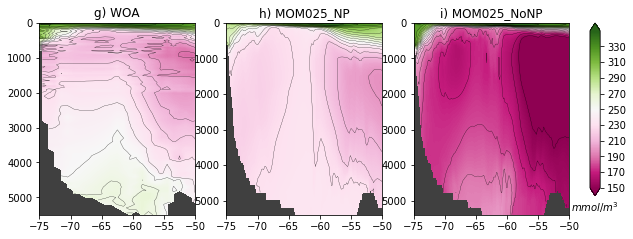

In [32]:
#Weddell Sea 60W-0E

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(150,350,.1)
print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(150,350,10)
print clev3

#var1=np.nanmean(woa1_oxy[:,0:90,woa1_x1:woa1_x2],axis=2)*1000
var1=np.nanmean(woa2_oxy[0,:,0:90,woa2_x1:woa2_x2],axis=2)
#print var1.shape

plt.subplot(3,3,1)
plt.gca().patch.set_color('.25')
#p1=plt.contourf(woa1_lat[0:90],woa1_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contour(woa1_lat[0:90],woa1_depth,var1,levels=clev3,colors='k',linewidths=0.25)
p1=plt.contourf(woa2_lat[0:90],woa2_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(woa2_lat[0:90],woa2_depth,var1,levels=clev3,colors='k',linewidths=0.25)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('g) WOA')

yr=0

var1=np_cntrl_bgc.o2[0:12,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
#var1=np.nanmean(np_O2[:,0:500,x1:x2],axis=2)
print var1.shape

plt.subplot(3,3,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('h) MOM025_NP')

var1=nonp_cntrl_bgc.o2[0:12,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()
#var1=np.nanmean(nonp_O2[:,0:500,x1:x2],axis=2)
print var1.shape

plt.subplot(3,3,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('i) MOM025_NoNP')

ax3 = plt.axes([0.93,0.68,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$mmol/m^3$')




0.975609756098
[ 150.   150.1  150.2 ...,  349.7  349.8  349.9]
[150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320
 330 340]
(50, 500)
(50, 500)


Text(0.5,0,u'$umol/kg$')

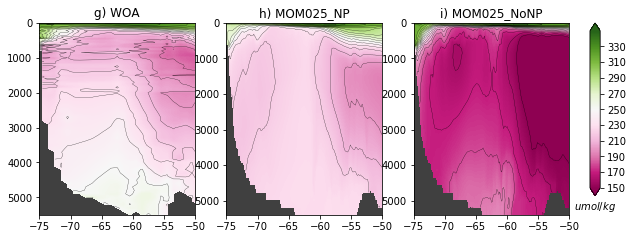

In [34]:
#plot Weddell values in umol/kg: *10^3/1025kg/m3
const=1000.0/1025
print const

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(150,350,.1)
print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(150,350,10)
print clev3

#var1=np.nanmean(woa1_oxy[:,0:90,woa1_x1:woa1_x2],axis=2)*1000
var1=np.nanmean(woa2_oxy[0,:,0:90,woa2_x1:woa2_x2],axis=2)*const
#print var1.shape

plt.subplot(3,3,1)
plt.gca().patch.set_color('.25')
#p1=plt.contourf(woa1_lat[0:90],woa1_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contour(woa1_lat[0:90],woa1_depth,var1,levels=clev3,colors='k',linewidths=0.25)
p1=plt.contourf(woa2_lat[0:90],woa2_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(woa2_lat[0:90],woa2_depth,var1,levels=clev3,colors='k',linewidths=0.25)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('g) WOA')

yr=0

var1=np_cntrl_bgc.o2[0:12,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()*const
#var1=np.nanmean(np_O2[:,0:500,x1:x2],axis=2)
print var1.shape

plt.subplot(3,3,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('h) MOM025_NP')

var1=nonp_cntrl_bgc.o2[0:12,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()*const
#var1=np.nanmean(nonp_O2[:,0:500,x1:x2],axis=2)
print var1.shape

plt.subplot(3,3,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('i) MOM025_NoNP')

ax3 = plt.axes([0.93,0.68,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$umol/kg$')

(1, 102, 180, 360)
woa2:  [112] [199] [54] [-67.5] [ 19.5] [-35.5]
[851] [1199] [-67.125] [ 19.875] [-35.18026735]
0.975609756098
[ 150.   150.1  150.2 ...,  349.7  349.8  349.9]
[150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320
 330 340]
(50, 500)
(50, 500)


Text(0.5,0,u'$umol/kg$')

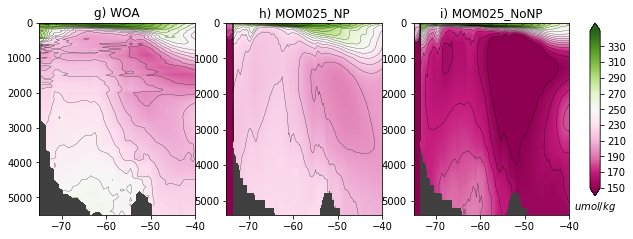

In [37]:
#plot Atlantic Basin values in umol/kg: *10^3/1025kg/m3
woa2_x1=np.argwhere(woa2_lon<-67)
woa2_x2=np.argwhere(woa2_lon<20)
woa2_x1=woa2_x1[-1]
woa2_x2=woa2_x2[-1]

woa_y1=np.argwhere(woa1_lat<-35)
#y2=np.argwhere(xt_ocean<15)
woa_y1=woa_y1[-1]
#y2=y2[-1]
#print 'woa1: ', woa1_x1, woa1_x2, woa1_lon[woa1_x1],woa1_lon[woa1_x2], woa1_lat[woa_y1]
print woa2_oxy.shape
print 'woa2: ', woa2_x1, woa2_x2, woa_y1, woa2_lon[woa2_x1],woa2_lon[woa2_x2], woa2_lat[woa_y1]

x1=np.argwhere(grid_xt<-67)
x2=np.argwhere(grid_xt<20)#was going to -15 but woa o2 data resets at 0
x1=x1[-1]
x2=x2[-1]

y1=np.argwhere(grid_yt<-35)
#y2=np.argwhere(xt_ocean<15)
y1=y1[-1]
#y2=y2[-1]
print x1, x2, grid_xt[x1],grid_xt[x2], grid_yt[y1]


const=1000.0/1025
print const

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(150,350,.1)
print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(150,350,10)
print clev3

#var1=np.nanmean(woa1_oxy[:,0:90,woa1_x1:woa1_x2],axis=2)*1000
var1=np.nanmean(woa2_oxy[0,:,0:90,woa2_x1:woa2_x2],axis=2)*const
#print var1.shape

plt.subplot(3,3,1)
plt.gca().patch.set_color('.25')
#p1=plt.contourf(woa1_lat[0:90],woa1_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contour(woa1_lat[0:90],woa1_depth,var1,levels=clev3,colors='k',linewidths=0.25)
p1=plt.contourf(woa2_lat[0:90],woa2_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(woa2_lat[0:90],woa2_depth,var1,levels=clev3,colors='k',linewidths=0.25)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-40])
plt.title('g) WOA')

yr=0

var1=np_cntrl_bgc.o2[0:12,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()*const
#var1=np.nanmean(np_O2[:,0:500,x1:x2],axis=2)
print var1.shape

plt.subplot(3,3,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-40])
plt.title('h) MOM025_NP')

var1=nonp_cntrl_bgc.o2[0:12,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()*const
#var1=np.nanmean(nonp_O2[:,0:500,x1:x2],axis=2)
print var1.shape

plt.subplot(3,3,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-40])
plt.title('i) MOM025_NoNP')

ax3 = plt.axes([0.93,0.68,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$umol/kg$')

(1, 102, 180, 360)
woa2:  [112] [199] [34] [-67.5] [ 19.5] [-55.5] [-50.5]
[819] [1199] [-75.125] [ 19.875] [-55.13874852]
0.975609756098
[ 150.   150.1  150.2 ...,  349.7  349.8  349.9]
[150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320
 330 340]
(50, 1440)
(50, 1440)


Text(0.5,0,u'$umol/kg$')

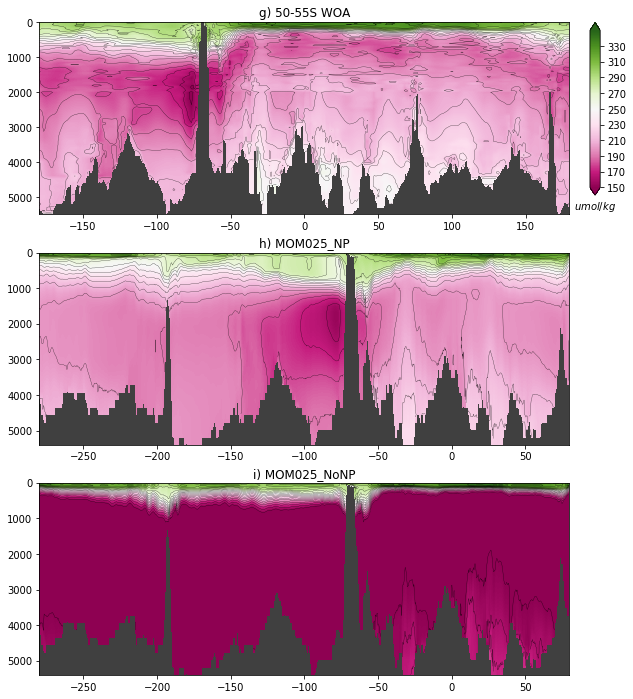

In [40]:
#plot Atlantic dep lat slices at 60S and 50S 
#Basin values in umol/kg: *10^3/1025kg/m3

woa2_x1=np.argwhere(woa2_lon<-67)
woa2_x2=np.argwhere(woa2_lon<20)
woa2_x1=woa2_x1[-1]
woa2_x2=woa2_x2[-1]

woa_y1=np.argwhere(woa1_lat<-55)
#y2=np.argwhere(xt_ocean<15)
woa_y1=woa_y1[-1]

woa_y2=np.argwhere(woa1_lat<-50)
woa_y2=woa_y2[-1]

#y2=y2[-1]
#print 'woa1: ', woa1_x1, woa1_x2, woa1_lon[woa1_x1],woa1_lon[woa1_x2], woa1_lat[woa_y1]
print woa2_oxy.shape
print 'woa2: ', woa2_x1, woa2_x2, woa_y1, woa2_lon[woa2_x1],woa2_lon[woa2_x2], woa2_lat[woa_y1], woa2_lat[woa_y2]

x1=np.argwhere(grid_xt<-75)
x2=np.argwhere(grid_xt<20)#was going to -15 but woa o2 data resets at 0
x1=x1[-1]
x2=x2[-1]

y1=np.argwhere(grid_yt<-55)
y1=y1[-1]
y2=np.argwhere(grid_yt<-50)
y2=y2[-1]
print x1, x2, grid_xt[x1],grid_xt[x2], grid_yt[y1]


const=1000.0/1025
print const

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(150,350,.1)
print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(150,350,10)
print clev3

#var1=np.nanmean(woa1_oxy[:,0:90,woa1_x1:woa1_x2],axis=2)*1000
var1=np.nanmean(woa2_oxy[0,:,woa_y1:woa_y2,:],axis=1)*const
#print var1.shape

plt.subplot(3,1,1)
plt.gca().patch.set_color('.25')
#p1=plt.contourf(woa1_lat[0:90],woa1_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contour(woa1_lat[0:90],woa1_depth,var1,levels=clev3,colors='k',linewidths=0.25)
p1=plt.contourf(woa2_lon,woa2_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(woa2_lon,woa2_depth,var1,levels=clev3,colors='k',linewidths=0.25)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
#plt.xlim([-75,-40])
plt.title('g) 50-55S WOA')

yr=0

var1=np_cntrl_bgc.o2[0:12,:,y1:y2,:].mean('time').mean('yt_ocean').load()*const
#var1=np.nanmean(np_O2[:,0:500,x1:x2],axis=2)
print var1.shape

plt.subplot(3,1,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(xt_ocean,st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(xt_ocean,st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
#plt.xlim([-75,-40])
plt.title('h) MOM025_NP')

var1=nonp_cntrl_bgc.o2[0:12,:,y1:y2,:].mean('Time').mean('yt_ocean').load()*const
#var1=np.nanmean(nonp_O2[:,0:500,x1:x2],axis=2)
print var1.shape

plt.subplot(3,1,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(xt_ocean,st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(xt_ocean,st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
#plt.xlim([-75,-40])
plt.title('i) MOM025_NoNP')

ax3 = plt.axes([0.93,0.68,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$umol/kg$')

In [26]:
#plot control zavg temp, rho, salt 
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.title('Zonal Avg Tracers 40W-15E')
var1=np.nanmean(woa_rho[:,0:500,x1:x2],axis=2)

clev = np.arange(27.5,27.9,.002)
#print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(27.5,27.9,.005)
#print clev3

plt.subplot(4,3,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(grid_yt[0:500],zt,var1-1000,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1-1000,levels=clev3,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('a) WOA')

yr=0

var1=np_cntrl.pot_rho_0[0:9,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
print var1.shape

plt.subplot(4,3,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1-1000,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1-1000,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('b) MOM025_NP')

var1=nonp_cntrl.pot_rho_0[0:9,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()
print var1.shape

plt.subplot(4,3,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1-1000,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1-1000,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('c) MOM025_NoNP')

ax3 = plt.axes([0.99,0.82,0.012,0.12])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$kg/m^3$')


clev = np.arange(-2,2,.05)
#print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(-2,2,.1)
#print clev3

var1=np.nanmean(woa_temp[:,0:500,x1:x2],axis=2)

plt.subplot(4,3,4)
plt.gca().patch.set_color('.25')
p1=plt.contourf(grid_yt[0:500],zt,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('d) WOA')

yr=0

var1=np_cntrl.temp[0:9,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
print var1.shape

plt.subplot(4,3,5)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('e) MOM025_NP')

var1=nonp_cntrl.temp[0:9,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()
print var1.shape

plt.subplot(4,3,6)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('f) MOM025_NoNP')

ax3 = plt.axes([0.99,0.56,0.012,0.12])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$^\circ C$')


clev = np.arange(34,34.8,.01)
#print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(34,34.8,.02)
#print clev3

var1=np.nanmean(woa_salt[:,0:500,x1:x2],axis=2)

plt.subplot(4,3,7)
plt.gca().patch.set_color('.25')
p1=plt.contourf(grid_yt[0:500],zt,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('g) WOA')

yr=0

var1=np_cntrl.salt[0:9,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
print var1.shape

plt.subplot(4,3,8)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('h) MOM025_NP')

var1=nonp_cntrl.salt[0:9,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()
print var1.shape

plt.subplot(4,3,9)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('i) MOM025_NoNP')

ax3 = plt.axes([0.99,0.30,0.012,0.12])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$S_A$')

#plt.suptitle('Depth (m)',x=0.4,y=0.1,rotation=90,fontsize=14)
#plt.suptitle('Latitude ($^\circ$)',x=0.5,y=0.2,fontsize=14)


clev = np.arange(150,350,1)
print clev
#clev3 = np.arange(27.66,27.9,.002)
clev3=np.arange(0,300,10)
print clev3

#var1=np.nanmean(woa1_oxy[:,0:90,woa1_x1:woa1_x2],axis=2)*1000
var1=np.nanmean(woa2_oxy[0,:,0:90,woa2_x1:woa2_x2],axis=2)
print var1.shape

plt.subplot(4,3,10)
plt.gca().patch.set_color('.25')
#p1=plt.contourf(woa1_lat[0:90],woa1_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
#plt.contour(woa1_lat[0:90],woa1_depth,var1,levels=clev3,colors='k',linewidths=0.25)
p1=plt.contourf(woa2_lat[0:90],woa2_depth,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(woa2_lat[0:90],woa2_depth,var1,levels=clev3,colors='k',linewidths=0.25)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('j) WOA')

yr=0

var1=np_cntrl_bgc.o2[0:12,:,0:500,x1:x2].mean('time').mean('xt_ocean').load()
print var1.shape

plt.subplot(4,3,11)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('k) MOM025_NP')

var1=nonp_cntrl_bgc.o2[0:12,:,0:500,x1:x2].mean('Time').mean('xt_ocean').load()
print var1.shape

plt.subplot(4,3,12)
plt.gca().patch.set_color('.25')
p1=plt.contourf(yt_ocean[0:500],st_ocean,var1,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contour(yt_ocean[0:500],st_ocean,var1,levels=clev3,colors='k',linewidths=0.25)
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('kg/m3')
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yt_ocean[0:500],st_ocean,pert_ztemp-cntrl_ztemp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
#plt.ylabel('Depth (m)')
#plt.xlabel('Latitude ($^\circ$S)')
plt.xlim([-75,-50])
plt.title('l) MOM025_NoNP')

ax3 = plt.axes([0.99,0.05,0.012,0.12])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$\mu mol/m^3$')

plt.tight_layout()

of = '/g/data1/v45/pas561/mom/archive/wp2_figs/TS_02_WOA.png'
plt.savefig(of,dpi=220)



NameError: name 'woa_rho' is not defined